In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

# 确保中文字符显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 1. 数据加载与初步探索

In [2]:
# 读取数据
file_path = os.path.join('../data', 'tmall_order_report.csv')
data = pd.read_csv(file_path)

# 显示数据前几行
data.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaN,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8


In [3]:
# 数据摘要
data.describe()

,订单编号,总金额,买家实际支付金额,退款金额
count,28010.000000,28010.000000,28010.000000,28010.000000
mean,14005.500000,106.953253,67.921712,20.433271
std,8085.934856,1136.587094,151.493434,71.501963
min,1.000000,1.000000,0.000000,0.000000
25%,7003.250000,38.000000,0.000000,0.000000
50%,14005.500000,75.000000,45.000000,0.000000
75%,21007.750000,119.000000,101.000000,0.000000
max,28010.000000,188320.000000,16065.000000,3800.000000


## 2. 假设检验

In [4]:
# 假设：买家实际支付金额的均值是否显著不同于50
mean_to_test = 50
actual_payment = data['买家实际支付金额'].dropna()

# 单样本t检验
t_stat, p_value = stats.ttest_1samp(actual_payment, mean_to_test)
print(f"t统计量: {t_stat}")
print(f"p值: {p_value}")

# 判断显著性
alpha = 0.05
if p_value < alpha:
    print("拒绝原假设，买家实际支付金额的均值显著不同于50。")
else:
    print("无法拒绝原假设，买家实际支付金额的均值与50无显著差异。")

t统计量: 19.79895346894023
p值: 1.191137531365778e-86
拒绝原假设，买家实际支付金额的均值显著不同于50。


## 3. 结果可视化

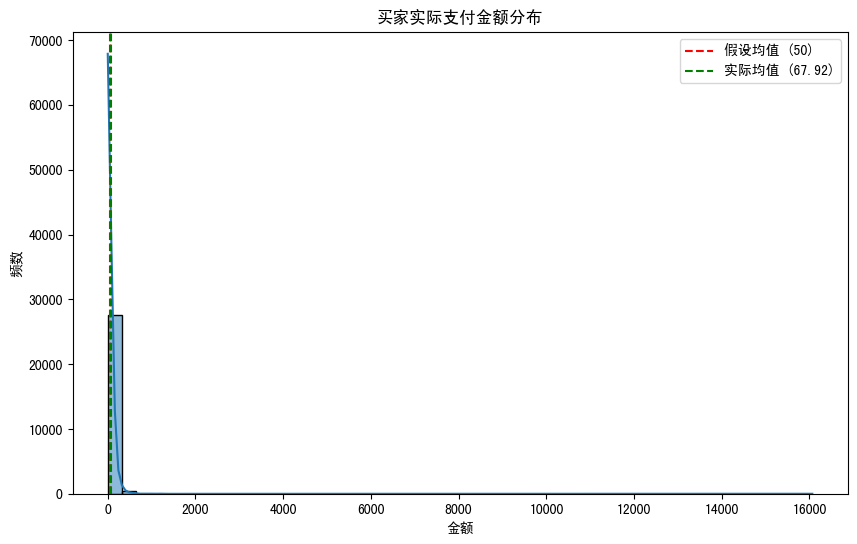

In [5]:
# 绘制买家实际支付金额的分布
plt.figure(figsize=(10, 6))
sns.histplot(actual_payment, kde=True, bins=50)
plt.axvline(mean_to_test, color='red', linestyle='--', label=f'假设均值 ({mean_to_test})')
plt.axvline(actual_payment.mean(), color='green', linestyle='--', label=f'实际均值 ({actual_payment.mean():.2f})')
plt.title('买家实际支付金额分布')
plt.xlabel('金额')
plt.ylabel('频数')
plt.legend()
plt.show()

## 4. 结论

根据假设检验的结果，我们得出结论：买家实际支付金额的均值是否显著不同于50。